# importing Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Load dataset

In [72]:
df=pd.read_csv('/Dataset/data.csv')

In [73]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


# EDA

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


### checking present of null values

In [75]:
df.isna().sum()

x1    5
x2    3
y     0
dtype: int64

In [76]:
df.dropna(inplace=True)

In [77]:
df.isna().sum()

x1    0
x2    0
y     0
dtype: int64

In [78]:
df.describe()

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


# Data Visualizaion

array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

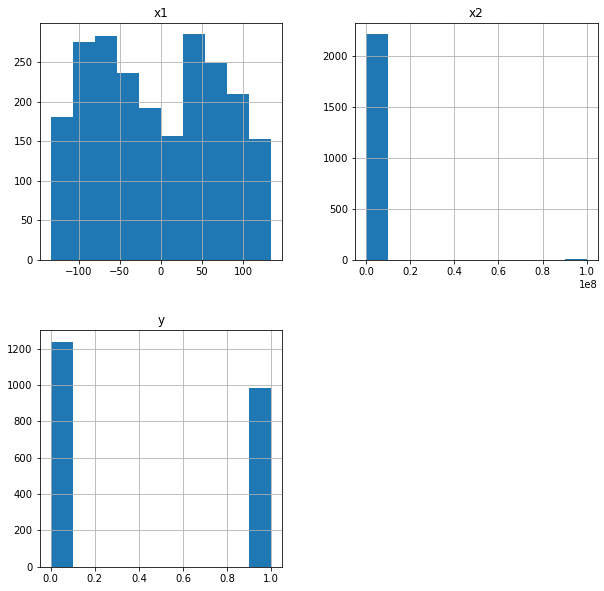

In [79]:
df.hist(figsize=(10,10))

<AxesSubplot:xlabel='x1', ylabel='x2'>

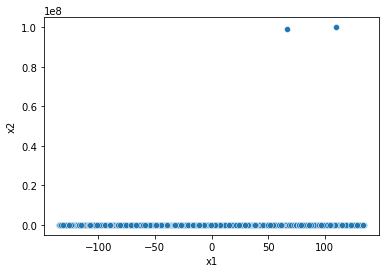

In [80]:
sns.scatterplot(x='x1',y='x2',data=df)

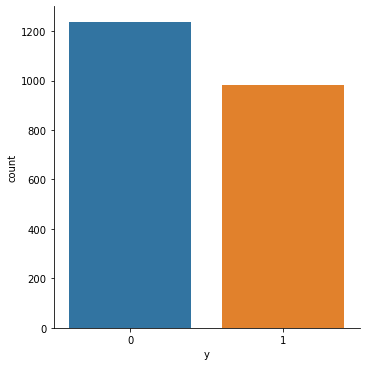

In [81]:
sns.catplot(data=df,x='y',kind='count')

<AxesSubplot:>

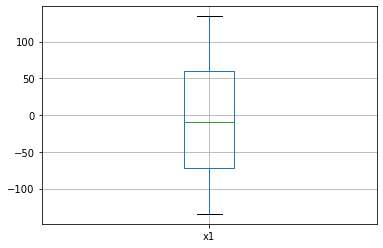

In [82]:
df.boxplot(['x1'])


<AxesSubplot:>

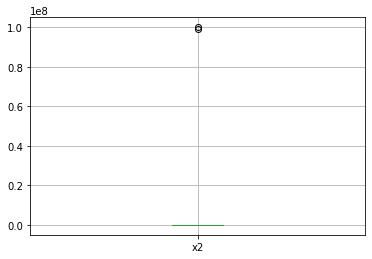

In [83]:
df.boxplot(['x2'])

In [84]:
# remove outliers with IQR method
# IQR -> Q3-Q1
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

x1    131.544509
x2    144.164141
y       1.000000
dtype: float64

In [85]:
#Q1-1.5*IQR to Q3+1.5*IQR   #to remove outlier from data
o_df=df[~((df<Q1-1.5*IQR) | (df> Q3+1.5*IQR)).any(axis=1)]
o_df.shape  # lower bound         upper bump      

(2217, 3)

<AxesSubplot:>

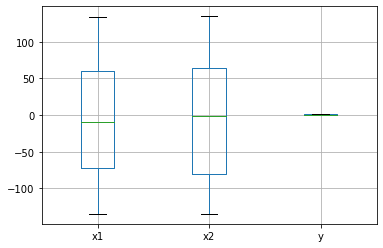

In [86]:
o_df.boxplot()

# Dependendent and independent variable

In [87]:
x=o_df.drop(columns=['y'])
y=o_df['y']

In [88]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

# 1. Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [90]:
ypred=model.predict(xtest)

Accuracy is : 0.7657657657657657
[[250   0]
 [104  90]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       250
           1       1.00      0.46      0.63       194

    accuracy                           0.77       444
   macro avg       0.85      0.73      0.73       444
weighted avg       0.83      0.77      0.74       444



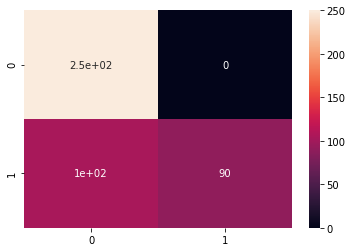

In [91]:
# Evaluation of model
from sklearn.metrics import precision_recall_fscore_support as score
acc=accuracy_score(ytest,ypred)
print("Accuracy is :",acc)
cm=confusion_matrix(ytest,ypred)
print(cm)
print(classification_report(ytest,ypred))
sns.heatmap(cm,annot=True)

plt.show()

# Hyper parameter tuning of Logistic Regression

In [74]:
#model 
import warnings
warnings.filterwarnings("ignore")
model=LogisticRegression()
#Parameters
penalty =['l1', 'l2', 'elasticnet']
C=[10,1,0.1,0.001,0.0001]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#grid 
grid=dict(solver=solver,C=C,penalty=penalty)
#cv 
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=0)
#Grid Search cv
from sklearn.model_selection import GridSearchCV
gridcv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy",error_score=0)
result=gridcv.fit(x,y)
print(result.best_score_)
print(result.best_params_)

0.744246056010762
{'C': 0.0001, 'penalty': 'l2', 'solver': 'saga'}


## Training with best parameter

In [92]:
model=LogisticRegression(C= 0.0001, penalty= 'l2', solver='saga')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy is : 0.7792792792792793
[[249   1]
 [ 97  97]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       250
           1       0.99      0.50      0.66       194

    accuracy                           0.78       444
   macro avg       0.85      0.75      0.75       444
weighted avg       0.84      0.78      0.76       444



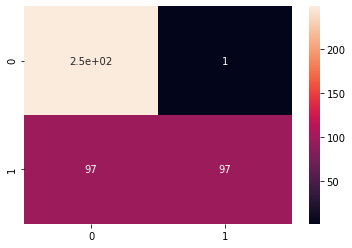

In [93]:
#Model Evaluation 
lr_acc=accuracy_score(ytest,ypred)
print("Accuracy is :",lr_acc)
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

After using best parameter the accuracy incresed.

# 2.SVM with rbf kernel

In [94]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is= 0.954954954954955
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       250
           1       0.95      0.94      0.95       194

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



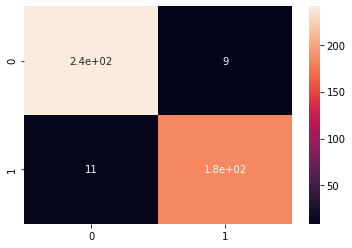

In [95]:
# evaluation of model
acc=accuracy_score(ytest,ypred)
print("Accuracy is=",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# 3.SVM with linear kernel

In [96]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)


Accuracy is= 0.759009009009009
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       250
           1       1.00      0.45      0.62       194

    accuracy                           0.76       444
   macro avg       0.85      0.72      0.72       444
weighted avg       0.83      0.76      0.73       444



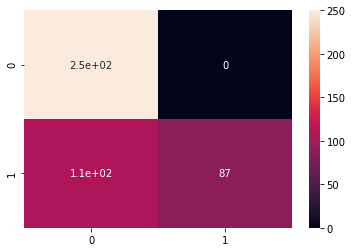

In [97]:
# Evaluation of model
acc=accuracy_score(ytest,ypred)
print("Accuracy is=",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Hyper parameter tuning

In [42]:
# model
model=SVC()
#parameter
kernel=['linear','rbf']
C=[1,0.1,0.01,0.001]
#grid
grid=dict(kernel=kernel,C=C)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
# result
res=grid_cv.fit(xtrain,ytrain)
print(res.best_score_)
print(res.best_params_)

0.9475451579533698
{'C': 1, 'kernel': 'rbf'}


# model training with best parameter

In [98]:
from sklearn.svm import SVC
model=SVC(C=1,kernel="rbf")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is= 0.954954954954955
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       250
           1       0.95      0.94      0.95       194

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



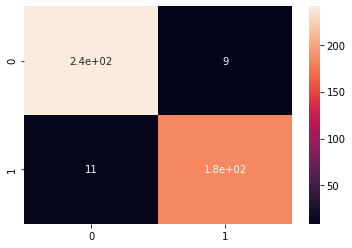

In [99]:
# Evaluation of model
SVM_acc=accuracy_score(ytest,ypred)
print("Accuracy is=",SVM_acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

In [ ]:
Using hyper parameter tuning the accuracy is increased.

# 4.Decision Tree classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [101]:
# prediction
ypred=model.predict(xtest)
ypred

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,

Accuracy is : 0.9346846846846847
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       250
           1       0.93      0.92      0.92       194

    accuracy                           0.93       444
   macro avg       0.93      0.93      0.93       444
weighted avg       0.93      0.93      0.93       444



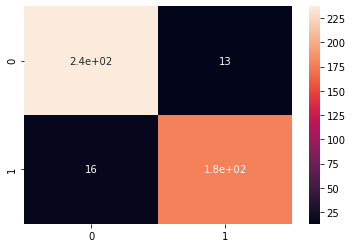

In [102]:
# Evaluation of model
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

# hyper parameter tuning of model

In [53]:
model=DecisionTreeClassifier()
criterion=["gini", "entropy"]
splitter=['best', 'random']
max_depth=range(1,11)
max_features=['auto','sqrt','log2']

#parameter
grid=dict(criterion=criterion,splitter=splitter,max_depth=max_depth, max_features=max_features)

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)

#gridcv
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)

print(res.best_score_)
print(res.best_params_)

0.93194716320522
{'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'splitter': 'best'}


# training model with best parameter

Accuracy is : 0.9369369369369369
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       250
           1       0.95      0.90      0.93       194

    accuracy                           0.94       444
   macro avg       0.94      0.93      0.94       444
weighted avg       0.94      0.94      0.94       444



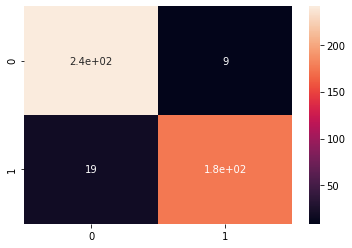

In [103]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=9,max_features='log2', splitter="best")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

#evaluation of model
DT_acc=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [ ]:
using best parameter the accuracy increased littlbit.

# 5.KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [105]:
ypred=model.predict(xtest)

Accuracy is  0.9527027027027027
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       250
           1       0.95      0.94      0.95       194

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



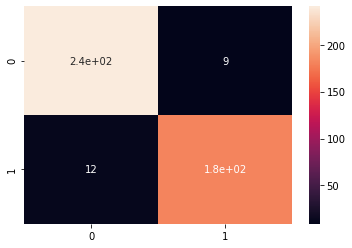

In [106]:
#evaluation
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy is ',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

# Tuning of hyperparameter

In [59]:
# model
model=KNeighborsClassifier()
# parameter grid
# 1. n_neighbors
# Weights
n_neighbors=range(1,31)
weights=['uniform','distance']
metric=['minkowski','euclidean','manhattan']
grid=dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
# GridSearchCv
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)

In [60]:
print(res.best_score_)
print(res.best_params_)

0.9509355189517518
{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}


### Training with best parameter

In [110]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=17,metric='manhattan',weights='uniform')
model.fit(xtrain,ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

In [111]:
ypred=model.predict(xtest)

Accuracy is  0.9594594594594594
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       250
           1       0.96      0.94      0.95       194

    accuracy                           0.96       444
   macro avg       0.96      0.96      0.96       444
weighted avg       0.96      0.96      0.96       444



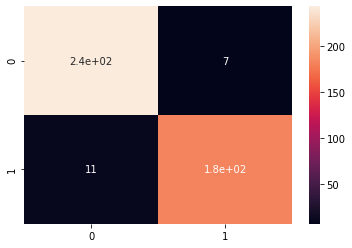

In [112]:
#evaluation
KNN_acc=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy is ',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

# Visulization of model accuracy

In [121]:
models = ['Logistic Regression','SVM','Decision Tree','KNN']
accuracy = [lr_acc,SVM_acc,DT_acc,KNN_acc]

Evaluation = pd.DataFrame({'No.':[x+1 for x in range(len(models))],'Model':models,'Accuracy':accuracy})

In [122]:
Evaluation.sort_values(by='Accuracy',ascending=False,inplace=True)
Evaluation.style.highlight_max(subset = ['Accuracy'],color = 'lightgreen')

,No.,Model,Accuracy
3,4,KNN,0.959459
1,2,SVM,0.954955
2,3,Decision Tree,0.936937
0,1,Logistic Regression,0.779279


Text(0.5, 1.0, 'Evaluation of models')

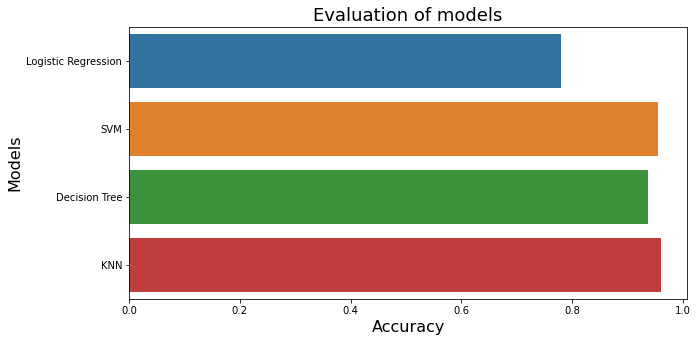

In [125]:
plt.figure(figsize = (10,5))
sns.barplot(x=accuracy, y=models)
plt.xlabel('Accuracy',fontdict={'fontsize':16})
plt.ylabel('Models',fontdict={'fontsize':16})
plt.title('Evaluation of models',fontdict={'fontsize':18})

# From above graph we can see the accuracy of KNN algorithm is more so we can select this model for classification.